In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
fp = '../data/full_data.csv'

In [64]:
musics = pd.read_csv(fp).iloc[:, 1:].sort_values(by = 'year')

In [65]:
musics.head()

,album,artist,id,title,year,file,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,bandwidth,centroid,rolloff,acousticness,danceability,energy,loudness,speechiness,tempo,valence
0,The Sugarhill Gang,The Sugarhill Gang,1FnxNtKli7rcB9IU4J8MEg,Rapper's Delight,1980,./data/Rapper's Delight.mp3,1.890811e-08,-3.804202e-07,-2.639254e-07,-6.431760e-08,...,2932.269422,3271.149826,6835.888420,0.2200,0.905,0.692,-14.143,0.199,111.292,0.943
1,Kurtis Blow,Kurtis Blow,5TvcggVu3s2P1fMAS8BupX,The Breaks,1980,./data/The Breaks.mp3,1.057499e-07,6.933380e-08,-1.520881e-07,-3.618482e-07,...,2574.581462,2369.193568,5234.249962,0.0987,0.910,0.576,-13.256,0.109,112.877,0.907
2,8th Wonder,The Sugarhill Gang,4UCkX8nrBlpxjrrEqtb46a,Apache,1981,./data/Apache.mp3,-1.414954e-07,1.606020e-08,-4.006917e-08,-1.196751e-08,...,2535.741911,2907.329677,5791.839284,0.3320,0.827,0.928,-7.266,0.133,115.023,0.261
3,8th Wonder,The Sugarhill Gang,6m0wOLtrzaNwMofVVJTJqs,8th Wonder,1981,./data/8th Wonder.mp3,3.262833e-07,-1.683564e-08,-7.625627e-08,-1.203945e-07,...,2537.327894,3135.834750,5981.420399,0.2980,0.871,0.937,-8.536,0.195,106.494,0.675
4,Planet Rock,Afrika Bambaataa,3uy0jtkM8QYVTsBazkli1x,Planet Rock,1982,./data/Planet Rock.mp3,-8.671024e-08,7.907207e-08,-5.019072e-08,-2.139210e-08,...,2803.020324,3522.282559,6855.145450,0.0110,0.915,0.807,-9.636,0.130,127.350,0.708


In [66]:
music_features = musics.drop(['artist', 'id', 'title', 'album', 'file', 'year'],axis = 1)
music_features.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,bandwidth,centroid,rolloff,acousticness,danceability,energy,loudness,speechiness,tempo,valence
0,1.890811e-08,-3.804202e-07,-2.639254e-07,-6.431760e-08,-1.080152e-07,-1.781040e-08,-4.801459e-08,7.261296e-08,1.197785e-07,8.293486e-08,...,2932.269422,3271.149826,6835.888420,0.2200,0.905,0.692,-14.143,0.199,111.292,0.943
1,1.057499e-07,6.933380e-08,-1.520881e-07,-3.618482e-07,6.409503e-08,1.053390e-07,1.140600e-07,1.873398e-07,-1.244921e-07,1.064396e-07,...,2574.581462,2369.193568,5234.249962,0.0987,0.910,0.576,-13.256,0.109,112.877,0.907
2,-1.414954e-07,1.606020e-08,-4.006917e-08,-1.196751e-08,2.808909e-07,-8.390938e-08,2.251238e-07,-1.769062e-08,-3.454570e-08,1.500061e-07,...,2535.741911,2907.329677,5791.839284,0.3320,0.827,0.928,-7.266,0.133,115.023,0.261
3,3.262833e-07,-1.683564e-08,-7.625627e-08,-1.203945e-07,-3.800182e-08,8.758165e-09,1.395069e-08,-2.490945e-07,-9.116444e-08,-1.617007e-07,...,2537.327894,3135.834750,5981.420399,0.2980,0.871,0.937,-8.536,0.195,106.494,0.675
4,-8.671024e-08,7.907207e-08,-5.019072e-08,-2.139210e-08,-3.428748e-08,-3.504222e-08,-1.334006e-08,3.385281e-07,-5.309370e-08,-7.372620e-08,...,2803.020324,3522.282559,6855.145450,0.0110,0.915,0.807,-9.636,0.130,127.350,0.708


In [67]:
music_features_su = music_features.apply(lambda x: (x - x.mean())/x.std())
music_features_su.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,bandwidth,centroid,rolloff,acousticness,danceability,energy,loudness,speechiness,tempo,valence
0,0.337411,-3.042355,-1.487090,-0.526804,-0.818746,-0.209644,-0.033679,0.264458,1.105131,0.285170,...,1.831385,1.648694,1.825219,0.570156,0.960676,0.107638,-2.213477,0.151679,-0.025229,1.607493
1,0.755278,0.733466,-0.797838,-2.261414,0.654395,0.737641,0.453069,0.716190,-0.878304,0.374930,...,0.340936,-0.267461,0.025023,-0.210168,1.000089,-0.640588,-1.930445,-0.759154,0.031555,1.442061
2,-0.434424,0.286218,-0.107467,-0.221602,2.510013,-0.718088,0.786618,-0.091109,-0.147954,0.541304,...,0.179096,0.875779,0.651737,1.290654,0.345844,1.629890,-0.019102,-0.516265,0.108438,-1.526519
3,1.816447,0.010047,-0.330488,-0.853733,-0.219481,-0.005274,0.152417,-1.002252,-0.607689,-0.649053,...,0.185705,1.361225,0.864821,1.071931,0.692672,1.687942,-0.424345,0.111198,-0.197123,0.375945
4,-0.170807,0.815221,-0.169846,-0.276547,-0.187689,-0.342194,0.070457,1.311488,-0.298561,-0.313093,...,1.292817,2.182212,1.846864,-0.774344,1.039501,0.849413,-0.775343,-0.546626,0.550068,0.527591


In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=2)

In [70]:
reduced_dim = pca.fit_transform(music_features_su)

In [78]:
music_reduced = pd.DataFrame(reduced_dim)
music_reduced.columns = [f'pca_feature{i + 1}' for i in range(2)]
music_reduced['name'] = musics['title']
music_reduced['year'] = musics['year']

In [79]:
music_reduced.head()

,pca_feature1,pca_feature2,name,year
0,0.570531,-2.573715,Rapper's Delight,1980
1,-0.717337,-0.848301,The Breaks,1980
2,-0.503183,-1.305737,Apache,1981
3,-1.534512,-1.842782,8th Wonder,1981
4,0.467788,-3.937306,Planet Rock,1982


In [80]:
music_reduced.loc[music_reduced['pca_feature1'].idxmax()]

pca_feature1                  26.7996
pca_feature2                -0.304011
name            I Don't Fuck With You
year                             2015
Name: 71, dtype: object

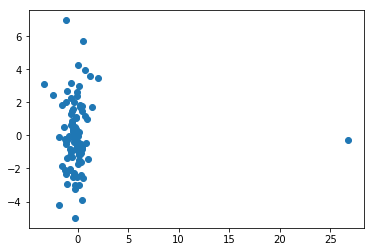

In [73]:
plt.scatter(x=music_reduced['pca_feature1'], y=music_reduced['pca_feature2'])

In [81]:
music_reduced = music_reduced.drop(71)

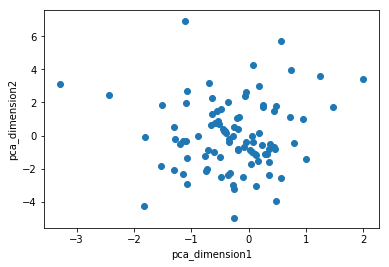

In [84]:
plt.xlabel('pca_dimension1')
plt.ylabel('pca_dimension2')
plt.scatter(x=music_reduced['pca_feature1'], y=music_reduced['pca_feature2'])

In [85]:
from sklearn.cluster import KMeans

In [162]:
kmeans = KMeans(n_clusters=4)

In [163]:
kmeans.fit(music_reduced[[f'pca_feature{i + 1}' for i in range(2)]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [164]:
music_reduced['group_kmeans'] = kmeans.labels_

In [165]:
music_reduced.head()

,pca_feature1,pca_feature2,name,year,group_kmeans
0,0.570531,-2.573715,Rapper's Delight,1980,1
1,-0.717337,-0.848301,The Breaks,1980,2
2,-0.503183,-1.305737,Apache,1981,2
3,-1.534512,-1.842782,8th Wonder,1981,1
4,0.467788,-3.937306,Planet Rock,1982,1


In [166]:
grouped = music_reduced.groupby('group_kmeans')[[f'pca_feature{i + 1}' for i in range(2)]]

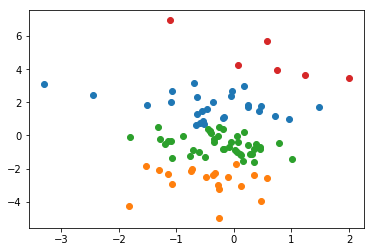

In [167]:
for name, group in grouped:
    plt.plot(group["pca_feature1"], group["pca_feature2"], marker="o", linestyle="", label=name)

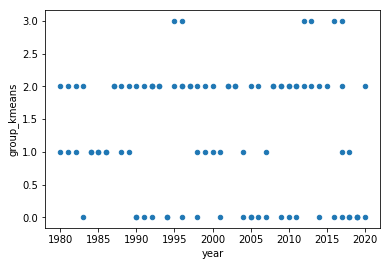

In [172]:
music_reduced[['year', 'group_kmeans']].plot.scatter(x = 'year', y = 'group_kmeans')